## <font color = blue> Assignment on Model Selection

### Import the necessary libraries & Load the dataset into python environment :

In [1]:
import numpy as np
import pandas as pd

# Plotting the data:
import matplotlib.pyplot as plt
import seaborn as sns 

# Preprocessing the dataset:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split

# Classification algorithms:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Analysis of classificaiton algorithms:
from sklearn.metrics import accuracy_score

# Model Selection
from sklearn.model_selection import cross_val_score, StratifiedKFold,KFold

In [2]:
# Remove warnings:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
data = pd.read_csv(r'C:\Users\sajee\Downloads\AATHIRA DSA\titanic_dataset _06.csv') 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = pd.read_csv(r'C:\Users\sajee\Downloads\AATHIRA DSA\titanic_dataset _06.csv', index_col='PassengerId')
data.head()      #Make ‘PassengerId’ as the index column

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Perform data understanding and exploration:

In [5]:
data.shape

(891, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


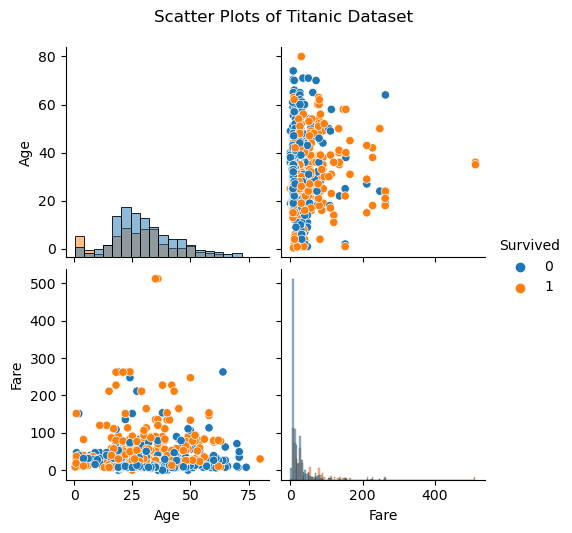

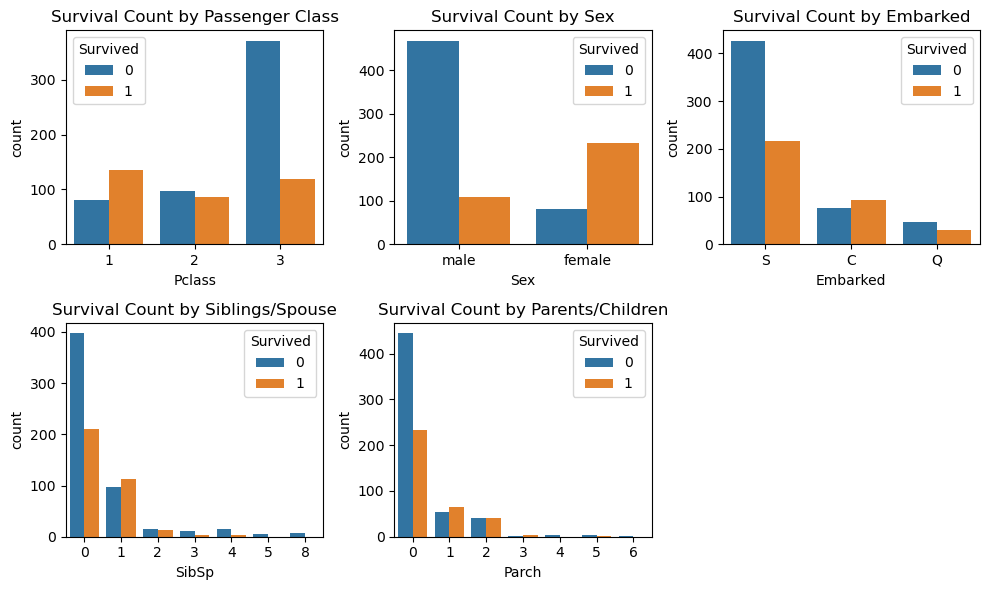

In [9]:
# Explore the relationship between variables in dataset:

# Drop unnecessary columns
df = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Plot scatter plots for numeric variables
sns.pairplot(df, vars=['Age', 'Fare'], hue='Survived', diag_kind='hist')
plt.suptitle("Scatter Plots of Titanic Dataset", y=1.05)
plt.show()

# Plot bar plots for categorical variables
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')

plt.subplot(2,3, 2)
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')

plt.subplot(2,3, 3)
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarked')

plt.subplot(2,3, 4)
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.title('Survival Count by Siblings/Spouse')

plt.subplot(2,3, 5)
sns.countplot(data=df, x='Parch', hue='Survived')
plt.title('Survival Count by Parents/Children')

plt.tight_layout()
plt.show()

### Perform data cleaning and outlier detection: 

In [10]:
# Check for missing values:

data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

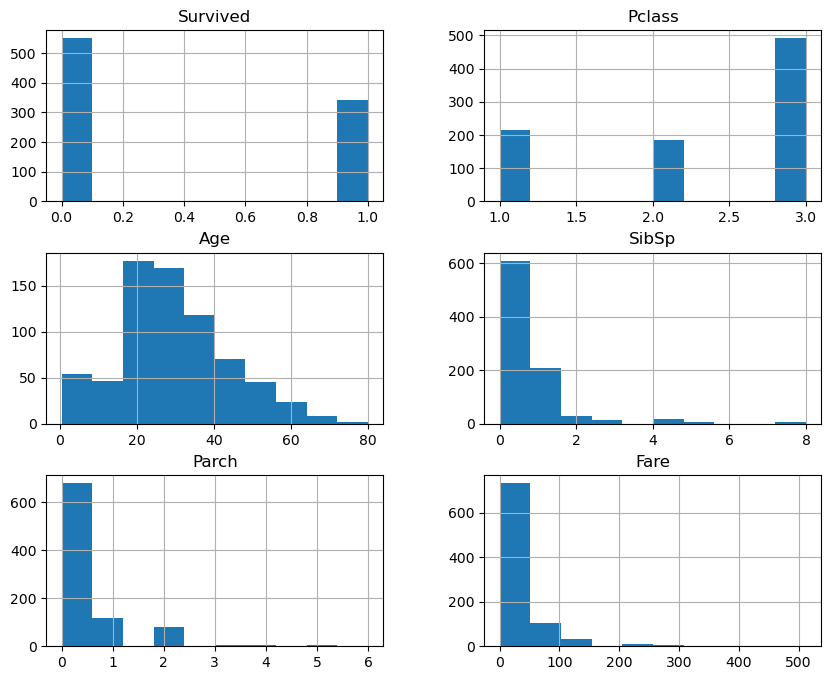

In [11]:
# Handle the missing values:

freqgraph = data.select_dtypes(include=['float' , 'int'])
freqgraph.hist(figsize=(10,8))
plt.show()

In [12]:
# Filling the missing values in the "Age" column of the dataset with the median value of the column:

for col in ['Age']:
    data[col]=data[col].fillna(data[col].median())

In [13]:
# Filling the missing values in categorical data columns('Cabin' & 'Embarked')with the mode value of each respective column:

for col in ['Cabin', 'Embarked']:
    data[col] = data[col].fillna(data[col].mode()[0])

In [14]:
# Again check for count of null values in each column after filling the missing values:

data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

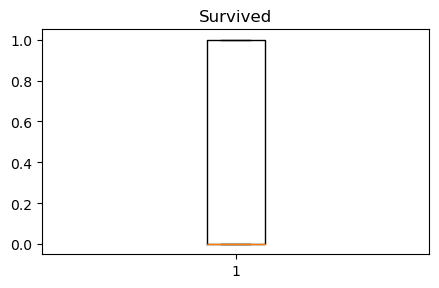

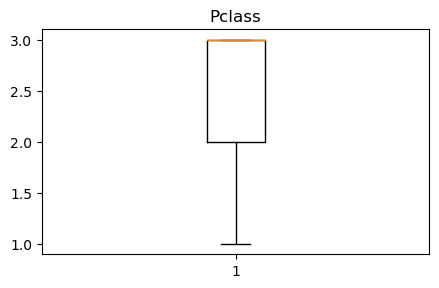

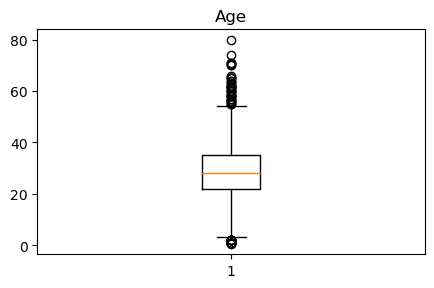

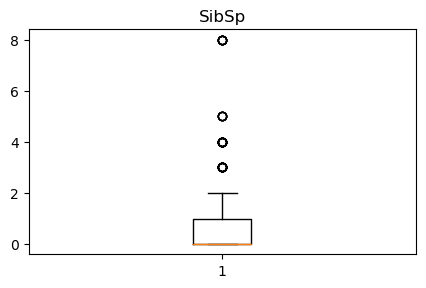

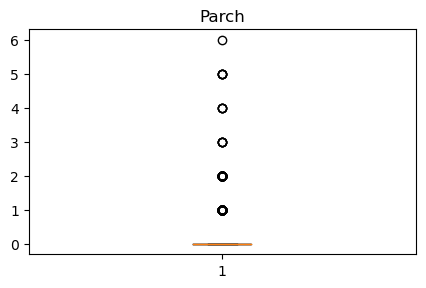

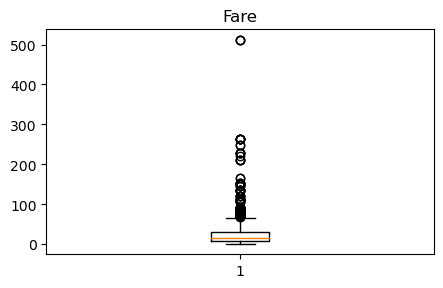

In [15]:
# Check for outliers:

num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

for i in num_cols:
    plt.figure(figsize=(5,2.92))
    plt.boxplot(data[i])
    plt.title(i)

In [16]:
# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'Age' column :

Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 22.0
Q2 = 28.0
Q3 = 35.0


In [17]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 13.0


In [18]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  54.5
low_lim =  2.5


In [19]:
outliers = []

for x in data ['Age'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [20]:
# Handle the outliers in the 'Age' column of the dataset:

data['Age'] = np.where(data['Age'] > up_lim, up_lim, np.where(data['Age'] < low_lim, low_lim, data['Age']))

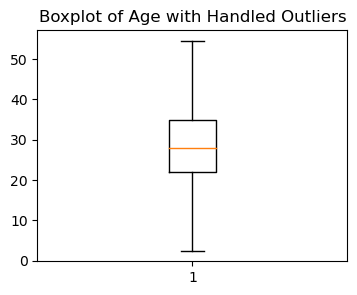

In [21]:
# Again check for outliers after filling:

plt.figure(figsize=(4, 3))
plt.boxplot(data['Age'])
plt.title('Boxplot of Age with Handled Outliers')
plt.show()

In [22]:
# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'SibSp' column :

Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 0.0
Q2 = 0.0
Q3 = 1.0


In [23]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 1.0


In [24]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  2.5
low_lim =  -1.5


In [25]:
outliers = []

for x in data ['SibSp'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [26]:
# Handle the outliers in the 'SibSp' column of the dataset:

data['SibSp'] = np.where(data['SibSp'] > up_lim, up_lim, np.where(data['SibSp'] < low_lim, low_lim, data['SibSp']))

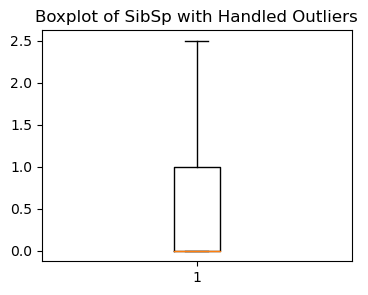

In [27]:
# Again check for outliers after filling:

plt.figure(figsize=(4, 3))
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp with Handled Outliers')
plt.show()

In [28]:
# Calculate the quartiles Q1, Q2 (median), and Q3 of the 'Fare' column :

Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 7.9104
Q2 = 14.4542
Q3 = 31.0


In [29]:
# Calculate the interquartile range (IQR):

IQR = Q3 - Q1

print (' IQR =', IQR)

 IQR = 23.0896


In [30]:
# Define the upper and lower limits for outliers:

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  65.6344
low_lim =  -26.724


In [31]:
outliers = []

for x in data ['Fare'] :
    if (x>up_lim) or (x<low_lim) :
        outliers.append(x)
print(outliers)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [32]:
# Handle the outliers in the 'Fare' column of the dataset:

data['Fare'] = np.where(data['Fare'] > up_lim, up_lim, np.where(data['Fare'] < low_lim, low_lim, data['Fare']))

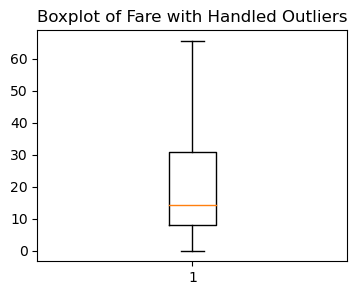

In [33]:
# Again check for outliers after filling:

plt.figure(figsize=(4, 3))
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare with Handled Outliers')
plt.show()

### Create a Heatmap to Visualize the Correlation:

In [34]:
# Drop unnecessary columns:
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

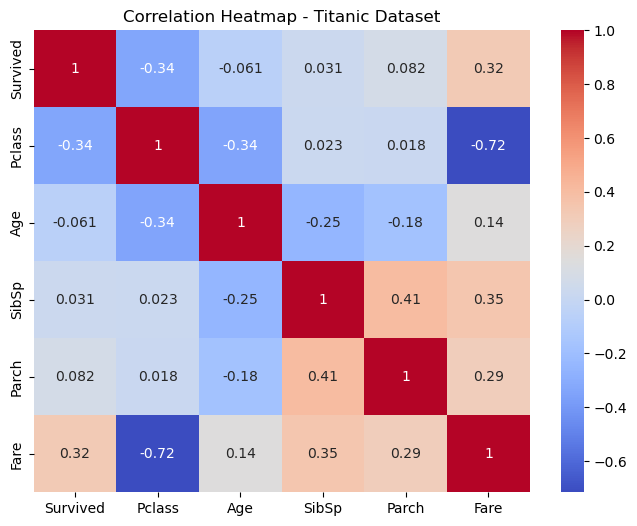

In [35]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title and display the heatmap:
plt.title('Correlation Heatmap - Titanic Dataset')
plt.show()

### Preprocess the Data:

In [36]:
# Check the distribution of the target variable:

data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Perfome Encoding: 

In [37]:
# Check the distribution of the categorical variables:

print ('Sex\n' , data['Sex'].value_counts())
print ('Embarked\n' , data['Embarked'].value_counts())

Sex
 male      577
female    314
Name: Sex, dtype: int64
Embarked
 S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [38]:
# Perform Label encoding on categorical variables:

le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])

data['Embarked'] = le.fit_transform(data['Embarked'])

In [39]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1.0,0,7.2500,2
2,1,1,0,38.0,1.0,0,65.6344,0
3,1,3,0,26.0,0.0,0,7.9250,2
4,1,1,0,35.0,1.0,0,53.1000,2
5,0,3,1,35.0,0.0,0,8.0500,2


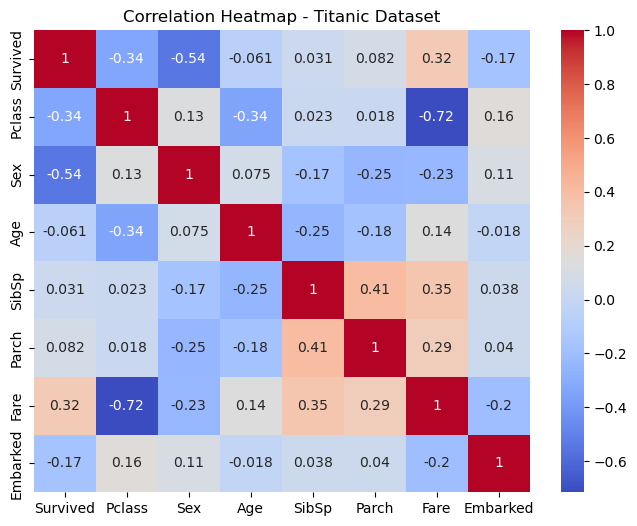

In [40]:
# Calculate the correlation matrix after encoding :

# Compute the correlation matrix:
corr_matrix = data.corr()

# Create a heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title and display the heatmap:
plt.title('Correlation Heatmap - Titanic Dataset')
plt.show()

### Train and Evaluate the models by applying Classification Algorithms: 

#### <font color = blue>Without Scaling:

In [41]:
# Split the data into features (X) and target (y):

X = data.drop('Survived', axis=1)     #independent variable
y = data['Survived']     #dependent variable

#### <font color = green>k-Nearest Neighbors (kNN) Classifier : 

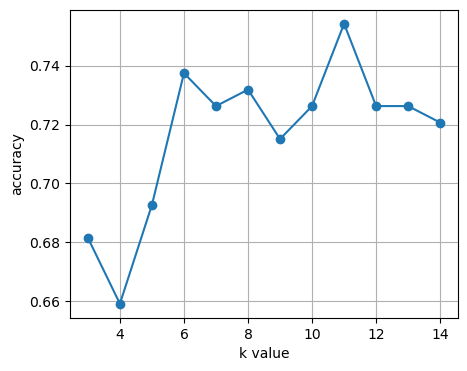

In [42]:
# Hold Out Techiniques:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the list to store accuracy scores:

metric = []
neighbors = np.arange(3, 15)  # Set the desired range here

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    knn.fit(X_train,y_train)    
    y_pred_knn = knn.predict(X_test)    
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

# Plot the number of neighbors (k value) and the corresponding accuracy metric:

plt.figure(figsize=(5,4))
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [43]:
knn = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski',p=2)

# Train the kNN classifier:
knn.fit(X_train,y_train)   
# Make predictions on the test set:
y_pred_knn = knn.predict(X_test)   
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))     # Hold Out Techiniques:

Accuracy =  0.7541899441340782


#### K Fold Cross Validation:

In [44]:
kfold_validation = KFold(10)
kfcv_results_knn = cross_val_score(knn,X,y,cv= kfold_validation)
kfcv_results_knn , np.mean(kfcv_results_knn)

(array([0.62222222, 0.66292135, 0.66292135, 0.71910112, 0.66292135,
        0.76404494, 0.75280899, 0.71910112, 0.78651685, 0.7752809 ]),
 0.7127840199750312)

In [45]:
print("kNN Average Accuracy KFold:", np.mean(kfcv_results_knn))

kNN Average Accuracy KFold: 0.7127840199750312


#### Stratified Cross Validation:

In [46]:
skfold_validator = StratifiedKFold(n_splits=10)
scv_results_knn = cross_val_score(knn,X,y,cv= skfold_validator)
scv_results_knn , np.mean(scv_results_knn)

(array([0.62222222, 0.65168539, 0.61797753, 0.75280899, 0.70786517,
        0.74157303, 0.75280899, 0.75280899, 0.75280899, 0.76404494]),
 0.7116604244694132)

In [47]:
print("kNN Average Accuracy Stratified:", np.mean(scv_results_knn))

kNN Average Accuracy Stratified: 0.7116604244694132


#### <font color = green>Support Vector Machines (SVM) Classifier:

In [48]:
svm = SVC(kernel='linear')

# Hold Out Techiniques:
# Train the SVM classifier:
svm.fit(X_train, y_train)
# Make predictions on the test set:
y_pred_svm = svm.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))     # Hold Out Techiniques:

Accuracy =  0.7821229050279329


###### K Fold Cross Validation: 

In [49]:
kfold_validation = KFold(10)
kfcv_results_svm = cross_val_score(svm,X,y,cv= kfold_validation)
kfcv_results_svm , np.mean(kfcv_results_svm)

(array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
        0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494]),
 0.786729088639201)

In [50]:
print("SVM Average Accuracy KFold:", np.mean(kfcv_results_svm))

SVM Average Accuracy KFold: 0.786729088639201


#### Stratified Cross Validation:

In [51]:
skfold_validator = StratifiedKFold(n_splits=10)
scv_results_svm = cross_val_score(svm,X,y,cv= skfold_validator)
scv_results_svm , np.mean(scv_results_svm)

(array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
        0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494]),
 0.786729088639201)

In [52]:
print("SVM Average Accuracy Stratified:", np.mean(scv_results_svm))

SVM Average Accuracy Stratified: 0.786729088639201


#### <font color = blue>Standard Scaling :

In [53]:
X = data.drop('Survived', axis=1)     #independent variable

# Perform standard scaling:
std_scl = StandardScaler()
X_std_scl = std_scl.fit_transform(X)
X_std_scl = pd.DataFrame(X_std_scl)

#### <font color = green>k-Nearest Neighbors (kNN) Classifier : 

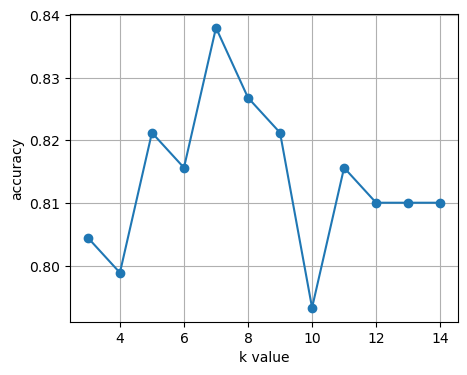

In [54]:
# Hold Out Techinique:
# Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_std_scl, y, test_size=0.2, random_state=42)

# Initialize the list to store accuracy scores:

metric = []
neighbors = np.arange(3, 15)  # Set the desired range here

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    knn.fit(X_train,y_train)    
    y_pred_knn = knn.predict(X_test)    
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

# Plot the number of neighbors (k value) and the corresponding accuracy metric:

plt.figure(figsize=(5,4))
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [55]:
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski',p=2)

# Train the kNN classifier:
knn.fit(X_train,y_train)   
# Make predictions on the test set:
y_pred_knn = knn.predict(X_test)   
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))     # Hold Out Techiniques:

Accuracy =  0.8379888268156425


#### K Fold Cross Validation:

In [56]:
kfold_validation = KFold(10)
kfcv_results_knn = cross_val_score(knn,X_std_scl,y,cv= kfold_validation)
kfcv_results_knn , np.mean(kfcv_results_knn)

(array([0.8       , 0.82022472, 0.74157303, 0.76404494, 0.83146067,
        0.83146067, 0.82022472, 0.74157303, 0.85393258, 0.78651685]),
 0.7991011235955056)

In [57]:
print("kNN Average Accuracy KFold_Std:", np.mean(kfcv_results_knn))

kNN Average Accuracy KFold_Std: 0.7991011235955056


#### Stratified Cross Validation:

In [58]:
skfold_validator = StratifiedKFold(n_splits=10)
scv_results_knn = cross_val_score(knn,X_std_scl,y,cv= skfold_validator)
scv_results_knn , np.mean(scv_results_knn)

(array([0.77777778, 0.79775281, 0.71910112, 0.78651685, 0.84269663,
        0.83146067, 0.85393258, 0.74157303, 0.85393258, 0.79775281]),
 0.8002496878901374)

In [59]:
print("kNN Average Accuracy Stratified_Std:", np.mean(scv_results_knn))

kNN Average Accuracy Stratified_Std: 0.8002496878901374


#### <font color = green>Support Vector Machines (SVM) Classifier:

In [60]:
svm = SVC(kernel='linear')

# Hold Out Techiniques:
# Train the SVM classifier:
svm.fit(X_train, y_train)
# Make predictions on the test set:
y_pred_svm = svm.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))     # Hold Out Techiniques:

Accuracy =  0.7821229050279329


#### K Fold Cross Validation: 

In [61]:
kfold_validation = KFold(10)
kfcv_results_svm = cross_val_score(svm,X_std_scl,y,cv= kfold_validation)
kfcv_results_svm , np.mean(kfcv_results_svm)

(array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
        0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494]),
 0.786729088639201)

In [62]:
print("SVM Average Accuracy KFold_Std:", np.mean(kfcv_results_svm))

SVM Average Accuracy KFold_Std: 0.786729088639201


#### Stratified Cross Validation:

In [63]:
skfold_validator = StratifiedKFold(n_splits=10)
scv_results_svm = cross_val_score(svm,X_std_scl,y,cv= skfold_validator)
scv_results_svm , np.mean(scv_results_svm)

(array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
        0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494]),
 0.786729088639201)

In [64]:
print("SVM Average Accuracy Stratified_Std:", np.mean(scv_results_svm))

SVM Average Accuracy Stratified_Std: 0.786729088639201


#### <font color = blue>MinMax Scaling :

In [65]:
X = data.drop(['Survived'],axis = 1) 

# Perform MinMax scaling:
minmax_scl = MinMaxScaler()
X_minmax_scl = minmax_scl.fit_transform(X)
X_minmax_scl = pd.DataFrame(X_minmax_scl)

#### <font color = green>k-Nearest Neighbors (kNN) Classifier : 

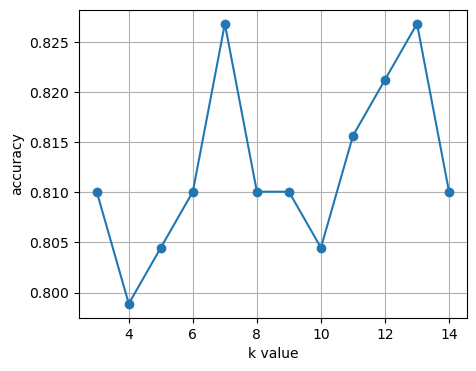

In [66]:
# Hold Out Techinique:
# Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_minmax_scl, y, test_size=0.2, random_state=42)

# Initialize the list to store accuracy scores:

metric = []
neighbors = np.arange(3, 15)  # Set the desired range here

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    knn.fit(X_train,y_train)    
    y_pred_knn = knn.predict(X_test)    
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

# Plot the number of neighbors (k value) and the corresponding accuracy metric:

plt.figure(figsize=(5,4))
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [67]:
knn = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski',p=2)

# Train the kNN classifier:
knn.fit(X_train,y_train)   
# Make predictions on the test set:
y_pred_knn = knn.predict(X_test)   
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))     # Hold Out Techiniques:

Accuracy =  0.8212290502793296


#### K Fold Cross Validation:

In [68]:
kfold_validation = KFold(10)
kfcv_results_knn = cross_val_score(knn,X_minmax_scl,y,cv= kfold_validation)
kfcv_results_knn , np.mean(kfcv_results_knn)

(array([0.75555556, 0.83146067, 0.78651685, 0.78651685, 0.84269663,
        0.84269663, 0.79775281, 0.76404494, 0.87640449, 0.7752809 ]),
 0.8058926342072409)

In [69]:
print("kNN Average Accuracy KFold_MinMax:", np.mean(kfcv_results_knn))

kNN Average Accuracy KFold_MinMax: 0.8058926342072409


#### Stratified Cross Validation:

In [70]:
skfold_validator = StratifiedKFold(n_splits=10)
scv_results_knn = cross_val_score(knn,X_minmax_scl,y,cv= skfold_validator)
scv_results_knn , np.mean(scv_results_knn)

(array([0.76666667, 0.80898876, 0.76404494, 0.80898876, 0.87640449,
        0.82022472, 0.83146067, 0.76404494, 0.85393258, 0.79775281]),
 0.809250936329588)

In [71]:
print("kNN Average Accuracy Stratified_MinMax:", np.mean(scv_results_knn))

kNN Average Accuracy Stratified_MinMax: 0.809250936329588


#### <font color = green>Support Vector Machines (SVM) Classifier:

In [72]:
svm = SVC(kernel='linear')

# Hold Out Techiniques:
# Train the SVM classifier:
svm.fit(X_train, y_train)
# Make predictions on the test set:
y_pred_svm = svm.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))     # Hold Out Techiniques:

Accuracy =  0.7821229050279329


#### K Fold Cross Validation:

In [73]:
kfold_validation = KFold(10)
kfcv_results_svm = cross_val_score(svm,X_minmax_scl,y,cv= kfold_validation)
kfcv_results_svm , np.mean(kfcv_results_svm)

(array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
        0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494]),
 0.786729088639201)

In [74]:
print("SVM Average Accuracy KFold_MinMax:", np.mean(kfcv_results_svm))

SVM Average Accuracy KFold_MinMax: 0.786729088639201


#### Stratified Cross Validation:

In [75]:
skfold_validator = StratifiedKFold(n_splits=10)
scv_results_svm = cross_val_score(svm,X_minmax_scl,y,cv= skfold_validator)
scv_results_svm , np.mean(scv_results_svm)

(array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
        0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494]),
 0.786729088639201)

In [76]:
print("SVM Average Accuracy Stratified_MinMax:", np.mean(scv_results_svm))

SVM Average Accuracy Stratified_MinMax: 0.786729088639201


In [77]:
print("kNN Average Accuracy KFold:", np.mean(kfcv_results_knn))
print("kNN Average Accuracy Stratified:", np.mean(scv_results_knn))
print("SVM Average Accuracy KFold:", np.mean(kfcv_results_svm))
print("SVM Average Accuracy Stratified:", np.mean(scv_results_svm))

print("kNN Average Accuracy KFold_Std:", np.mean(kfcv_results_knn))
print("kNN Average Accuracy Stratified_Std:", np.mean(scv_results_knn))
print("SVM Average Accuracy KFold_Std:", np.mean(kfcv_results_svm))
print("SVM Average Accuracy Stratified_Std:", np.mean(scv_results_svm))

print("kNN Average Accuracy KFold_MinMax:", np.mean(kfcv_results_knn))
print("kNN Average Accuracy Stratified_MinMax:", np.mean(scv_results_knn))
print("SVM Average Accuracy KFold_MinMax:", np.mean(kfcv_results_svm))
print("SVM Average Accuracy Stratified_MinMax:", np.mean(scv_results_svm))

kNN Average Accuracy KFold: 0.8058926342072409
kNN Average Accuracy Stratified: 0.809250936329588
SVM Average Accuracy KFold: 0.786729088639201
SVM Average Accuracy Stratified: 0.786729088639201
kNN Average Accuracy KFold_Std: 0.8058926342072409
kNN Average Accuracy Stratified_Std: 0.809250936329588
SVM Average Accuracy KFold_Std: 0.786729088639201
SVM Average Accuracy Stratified_Std: 0.786729088639201
kNN Average Accuracy KFold_MinMax: 0.8058926342072409
kNN Average Accuracy Stratified_MinMax: 0.809250936329588
SVM Average Accuracy KFold_MinMax: 0.786729088639201
SVM Average Accuracy Stratified_MinMax: 0.786729088639201


In [78]:
accuracies = {"kNN Average Accuracy KFold": np.mean(kfcv_results_knn),
    "kNN Average Accuracy Stratified": np.mean(scv_results_knn),
    "SVM Average Accuracy KFold": np.mean(kfcv_results_svm),
    "SVM Average Accuracy Stratified": np.mean(scv_results_svm),
    "kNN Average Accuracy KFold_Std" :np.mean(kfcv_results_knn),
    "kNN Average Accuracy Stratified_Std": np.mean(scv_results_knn),
    "SVM Average Accuracy KFold_Std": np.mean(kfcv_results_svm),
    "SVM Average Accuracy Stratified_Std": np.mean(scv_results_svm),
    "kNN Average Accuracy KFold_MinMax": np.mean(kfcv_results_knn),
    "kNN Average Accuracy Stratified_MinMax": np.mean(scv_results_knn),
    "SVM Average Accuracy KFold_MinMax": np.mean(kfcv_results_svm),
    "SVM Average Accuracy Stratified_MinMax": np.mean(scv_results_svm)}

# Find the maximum average accuracy
max_accuracy = max(accuracies.values())

# Find the best models with the maximum average accuracy
best_models = [model for model, accuracy in accuracies.items() if accuracy == max_accuracy]

# Print the best models
print("Best Models:")
for model in best_models:
    print(model)

print ('Max_Accuracy :' , max_accuracy)

Best Models:
kNN Average Accuracy Stratified
kNN Average Accuracy Stratified_Std
kNN Average Accuracy Stratified_MinMax
Max_Accuracy : 0.809250936329588


#### It appears that kNN achieves higher average accuracy values compared to SVM across Stratified KFold cross-validation method without scaling